In [1]:
!nvidia-smi
!lscpu

Tue Mar 12 03:02:07 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 537.58                 Driver Version: 537.58       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3060 ...  WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   58C    P0              27W /  95W |   2066MiB /  6144MiB |     16%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

'lscpu' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import torch
print('CUDA:',torch.version.cuda)

CUDA: None


# 1. Import Libraries

In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score,
                            confusion_matrix,
                            classification_report)

%matplotlib inline

# 2. Load dataset

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
df = pd.read_csv('dataset.csv')

df.head(10)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df1 = pd.read_csv('Symptom-severity.csv')

df1.head(10)

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5
5,chills,3
6,joint_pain,3
7,stomach_pain,5
8,acidity,3
9,ulcers_on_tongue,4


In [7]:
df1['Symptom']

0                   itching
1                 skin_rash
2      nodal_skin_eruptions
3       continuous_sneezing
4                 shivering
               ...         
128      inflammatory_nails
129                 blister
130    red_sore_around_nose
131       yellow_crust_ooze
132               prognosis
Name: Symptom, Length: 133, dtype: object

# 3. Data Exploration & Cleaning

In [8]:
df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Fungal infection,vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,muscle_pain,chest_pain,chest_pain,blood_in_sputum,muscle_pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [9]:
print(f"Length of dataset: {len(df)}")

print(f"\nNA values in dataset: \n{df.isna().sum()}")

print(f"\nPercentage NA values in dataset: \n{df.isna().sum()/len(df) * 100}")

Length of dataset: 4920

NA values in dataset: 
Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64

Percentage NA values in dataset: 
Disease        0.000000
Symptom_1      0.000000
Symptom_2      0.000000
Symptom_3      0.000000
Symptom_4      7.073171
Symptom_5     24.512195
Symptom_6     40.365854
Symptom_7     53.902439
Symptom_8     60.487805
Symptom_9     65.609756
Symptom_10    69.268293
Symptom_11    75.731707
Symptom_12    84.878049
Symptom_13    89.756098
Symptom_14    93.780488
Symptom_15    95.121951
Symptom_16    96.097561
Symptom_17    98.536585
dtype: float64


In [10]:
cols = df.columns
data = df[cols].values.flatten()
print(f"Shape: {data.shape}")
data

Shape: (88560,)


array(['Fungal infection', 'itching', ' skin_rash', ..., nan, nan, nan],
      dtype=object)

In [11]:
series_data = pd.Series(data)
series_data = series_data.str.strip()
series_data = series_data.values.reshape(df.shape)

df = pd.DataFrame(series_data, columns=df.columns)

df = df.fillna(0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,itching,skin_rash,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
vals = df.values
symptoms = df1['Symptom'].unique()

for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = df1[df1['Symptom'] == symptoms[i]]['weight'].values[0]

d = pd.DataFrame(vals, columns=cols)

d = d.replace('dischromic _patches', 0)
d = d.replace('spotting_ urination',0)
df = d.replace('foul_smell_of urine',0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
(df[cols] == 0).all()

df['Disease'].value_counts()

df['Disease'].unique()

data = df.iloc[:,1:].values
labels = df['Disease'].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, shuffle=True, test_size = 0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3936, 17) (984, 17) (3936,) (984,)


# 4. Classification Models  
* Logistic Regression
* Support Vector Machine
* Decision Tree Classifier
* Random Forest Classifier
* K-Nearest Neighbors


In [15]:
def confusion_plot(model, X_test, y_test):
    plt.figure(figsize=(8, 8), dpi=150)

    y_pred = model.predict(X_test)

    conf_mat = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())

    sns.heatmap(df_cm, annot=True)

In [16]:
def create_report(model, X_test, y_test):
    y_pred = model.predict(X_test)

    report = classification_report(y_test, y_pred)

    acc = accuracy_score(y_test, y_pred)

    print(f"Accuracy : {acc*100:.4f} %\n")
    print("Classification report: \n")
    print(report)

### 4.6 Gradient Boosting Algorithm

In [17]:
Boosting_model = GradientBoostingClassifier(n_estimators=250)
Boosting_model.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=250)

In [18]:
create_report(Boosting_model, X_test, y_test)

Accuracy : 99.5935 %

Classification report: 

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        23
                                   AIDS       1.00      1.00      1.00        30
                                   Acne       1.00      1.00      1.00        30
                    Alcoholic hepatitis       1.00      1.00      1.00        28
                                Allergy       1.00      1.00      1.00        27
                              Arthritis       1.00      1.00      1.00        30
                       Bronchial Asthma       1.00      1.00      1.00        17
                   Cervical spondylosis       0.90      1.00      0.95        18
                            Chicken pox       1.00      1.00      1.00        23
                    Chronic cholestasis       1.00      1.00      1.00        24
                            Common Cold       1.00      1.00 

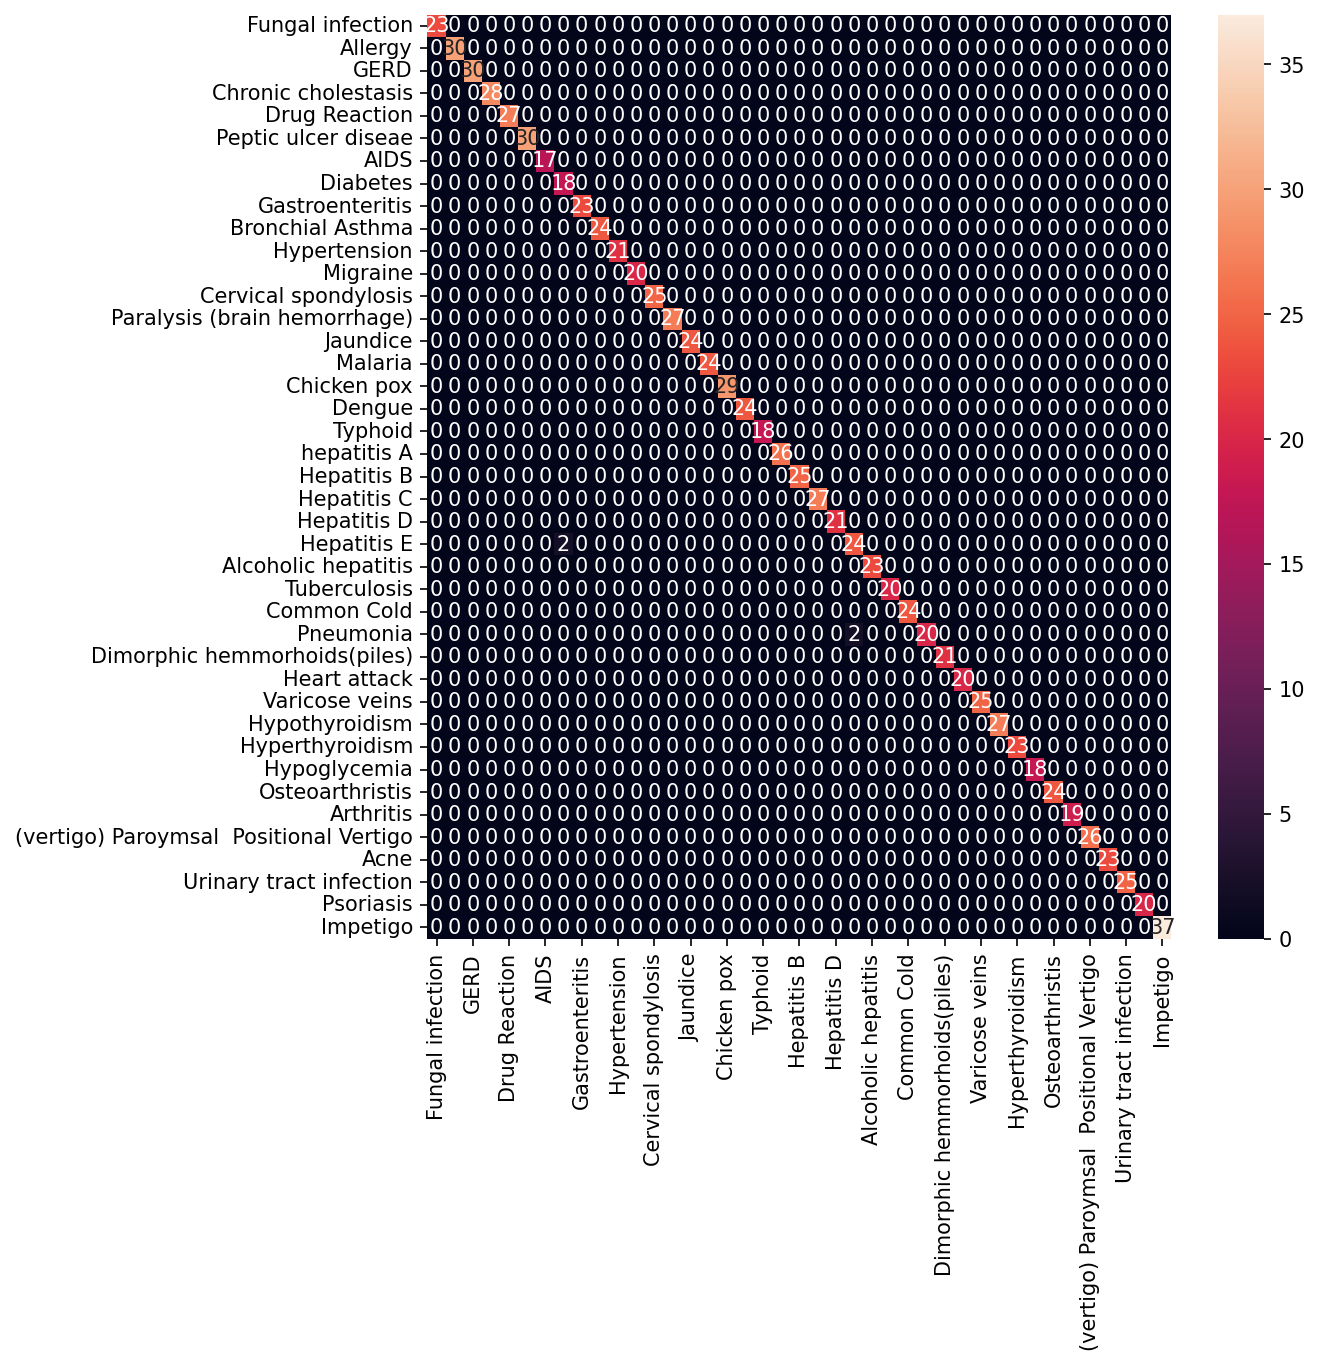

In [19]:
confusion_plot(Boosting_model, X_test, y_test)

### 4.6 GaussianNB

In [20]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [21]:
create_report(nb_model, X_test, y_test)

Accuracy : 86.9919 %

Classification report: 

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.50      0.91      0.65        23
                                   AIDS       0.83      0.97      0.89        30
                                   Acne       1.00      1.00      1.00        30
                    Alcoholic hepatitis       0.87      0.71      0.78        28
                                Allergy       0.91      0.78      0.84        27
                              Arthritis       1.00      0.80      0.89        30
                       Bronchial Asthma       1.00      0.65      0.79        17
                   Cervical spondylosis       0.54      0.72      0.62        18
                            Chicken pox       1.00      0.91      0.95        23
                    Chronic cholestasis       1.00      0.96      0.98        24
                            Common Cold       1.00      1.00 

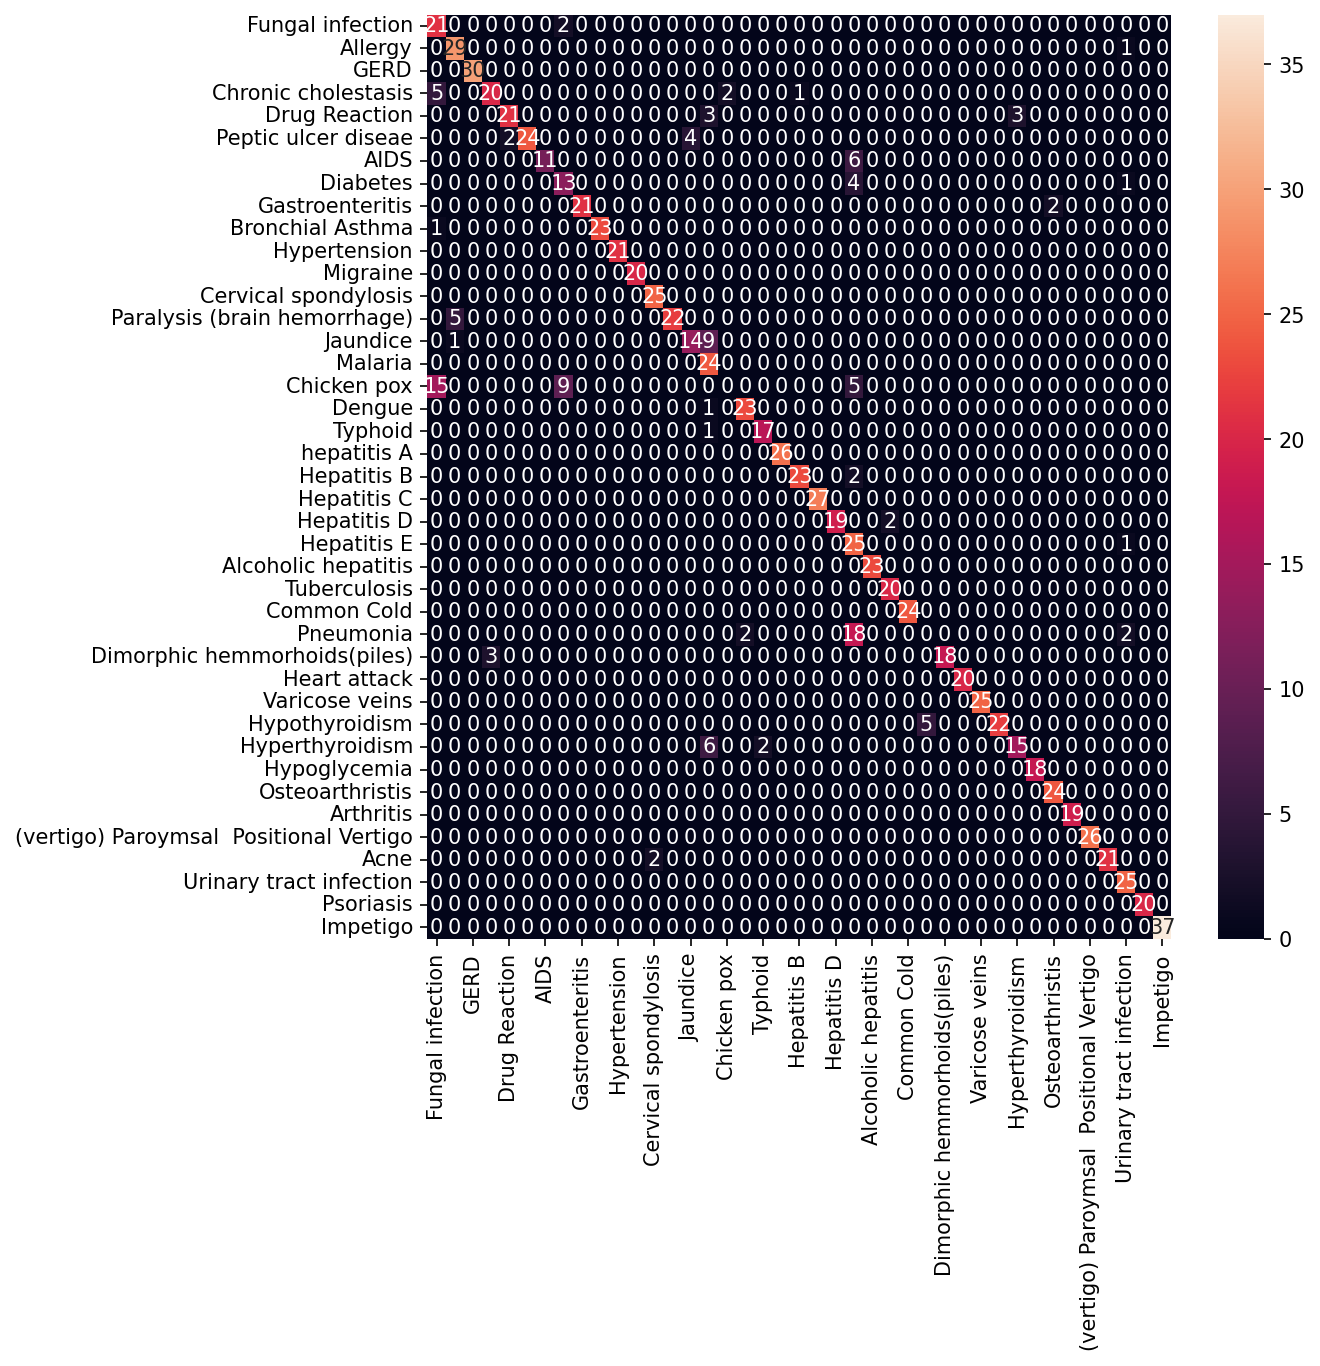

In [22]:
confusion_plot(nb_model, X_test, y_test)

In [29]:
from ipywidgets import interact_manual, Dropdown
# Exclude 'prognosis' from the symptom list
symptoms = df.columns[1:].tolist()
options_symptoms = df1['Symptom'].unique()
# Create a function to make predictions based on selected symptoms
def predict_disease(**selected_symptoms):
    # Ensure the input data structure is consistent with the training data

    input_data = pd.DataFrame({symptom: [0] for symptom in symptoms})
    for symptom, value in selected_symptoms.items():
        if symptom != 'Disease':
            a = np.array(df1["Symptom"])
            b = np.array(df1["weight"])
            for j in range(len(symptoms)):
                for k in range(len(a)):
                    if value==a[k]:
                        input_data[symptom] = int(b[k])

    # Ensure that the input data columns match the feature names used during training
    
    y_pred = Boosting_model.predict(input_data)
    y_pred1 = nb_model.predict(input_data)
            
    return print(f"The predicted Boosting_model disease based on symptoms is: {y_pred}\nThe predicted GaussianNB disease based on symptoms is:     {y_pred1} ")

interact_manual(predict_disease, **{symptom: Dropdown(options=options_symptoms, description=symptom, value = None) for symptom in symptoms if symptom != 'Disease'})

interactive(children=(Dropdown(description='Symptom_1', options=('itching', 'skin_rash', 'nodal_skin_eruptions…

<function __main__.predict_disease(**selected_symptoms)>

# 5. References
* https://www.kaggle.com/code/kunal2350/disease-prediction-and-analytics